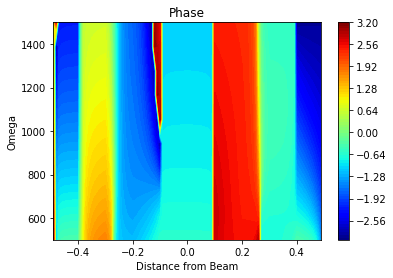

1.7384293257272478
0.0


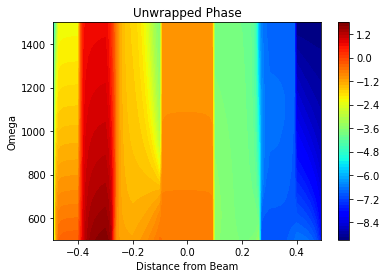

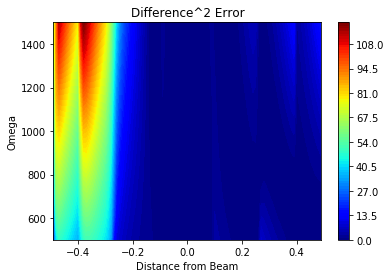

In [2]:
#from dolfin import *
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from skimage import data, img_as_float, color, exposure
from skimage.restoration import unwrap_phase

spacing = .01
depth = 1
omega = 20
n=1
tol = 1E-14
#Dx = omega/(2*36*np.pi**2)
Dx = 1
Dy = 1
Dz = 1
theta = np.pi/2
#umax = 2*np.pi*n
#xmax = umax*np.sqrt(2/omega)
truexc = 0
trueyc = 0

xcenter = truexc/np.sqrt(Dx)
ycenter = trueyc/np.sqrt(Dy)
truex = 2
truey = 1
truez = 1
xmax = truex/np.sqrt(Dx)
ymax = truey/np.sqrt(Dy)
zmax = truez/np.sqrt(Dz)
xpoints = 10
ypoints = 10
zpoints = 10
rdefect = .01
#xspace = .1
#yspace = .1
ndefectx = 5
ndefecty = 4

fname1 = '/Users/tiffanypaul/Desktop/Phasen3.txt'
fname2 = '/Users/tiffanypaul/Desktop/omegal3.txt'
fname3 = '/Users/tiffanypaul/Desktop/dl3.txt'

Fdat1 = np.loadtxt(fname1, delimiter="\t")
Fdat2 = np.loadtxt(fname2, delimiter="\t")
Fdat3 = np.loadtxt(fname3, delimiter="\t")

phasen = Fdat1[:]
omegal = Fdat2[:]
dl = Fdat3[:]

phasen = np.reshape(phasen, (len(omegal), len(dl)))
dn, omegan = np.meshgrid(dl, omegal)
fig = plt.gcf()
plt.contourf(dn, omegan, phasen, 100, cmap = cmx.jet)
#plt.plot(xline, yline, c = 'black', linewidth = 3)
plt.colorbar()
plt.title('Phase')
plt.xlabel('Distance from Beam')
plt.ylabel('Omega')
#fig.set_size_inches(8, truey/truex*8)
plt.show()

image_unwrapped = unwrap_phase(phasen)

imax = max(image_unwrapped.max(axis = 1))
print(imax)
n = np.abs(imax)//(np.pi*2)*np.sign(imax)
print(n)
image_unwrapped = image_unwrapped - 2*np.pi*n

fig = plt.gcf()
plt.contourf(dn, omegan, image_unwrapped, 100, cmap = cmx.jet)
#plt.plot(xline, yline, c = 'black', linewidth = 3)
plt.colorbar()
plt.title('Unwrapped Phase')
plt.xlabel('Distance from Beam')
plt.ylabel('Omega')
#fig.set_size_inches(8, truey/truex*8)
plt.show()

#print(7//pi)
dvec = np.sqrt(Dx**2 * np.cos(theta)**2 + Dy**2 * np.sin(theta)**2)
#phasefit = -np.sqrt(test[:,0]/2*dvec)*np.abs(test[:,1])
phasefit = -np.sqrt(omegan/2*dvec)*np.abs(dn)
phasefit = np.reshape(phasefit, (len(omegal), len(dl)))

dif = phasefit - image_unwrapped
fig = plt.gcf()
plt.contourf(dn, omegan, dif**2, 100, cmap = cmx.jet)
#plt.plot(xline, yline, c = 'black', linewidth = 3)
plt.colorbar()
plt.title('Difference^2 Error')
plt.xlabel('Distance from Beam')
plt.ylabel('Omega')
#fig.set_size_inches(8, truey/truex*8)
plt.show()

